In [15]:
## I. ПОДГОТОВКА ФАЙЛОВ ДЛЯ АНАЛИЗА

import os
os.chdir ('A:/MIPT')
import pandas as pd

In [2]:
# 1. Cоздание общей таблицы признаков для train и questions

In [3]:
questions= pd.read_csv('questions.csv', sep =',')
display(questions)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [4]:
train= pd.read_csv('train.zip', sep =',', dtype = {'row_id':'int32', 'user_id': 'int32', 'content_id': 'int16', 
                                        'content_type_id':'int8', 'task_container_id':'int16','user_answer':'int8',
                            'answered_correctly':'int8', 'prior_question_elapsed_time':'float32','prior_question_had_explanation': 'boolean'})

display(train.head(10))

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


In [5]:
train_questions = train.copy()

In [6]:
train_questions['question_id'] = 'NAN'

In [7]:
train_questions['question_id'] = train_questions[train_questions['content_type_id'] == 0]['content_id']

In [8]:
train_questions.drop(train_questions[train_questions['content_type_id'] == 1].index, inplace = True)

In [9]:
# Cлияние таблиц по ключу "question_id"
train_questions_new = pd.merge(train_questions, questions, left_on="question_id", right_index=True, how="left", sort=False)

In [10]:
# Удаление ненужных признаков:
train_questions_new.drop(['row_id','content_type_id', 'question_id_x','question_id_y', 'correct_answer'], axis=1, inplace = True)

In [11]:
display(train_questions_new.head(10))

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,part,tags
0,0,115,5692,1,3,1,NaN,<NA>,5692,5,151
1,56943,115,5716,2,2,1,37000.0,False,5716,5,168
2,118363,115,128,0,0,1,55000.0,False,128,1,131 149 92
3,131167,115,7860,3,0,1,19000.0,False,7860,1,131 104 81
4,137965,115,7922,4,1,1,11000.0,False,7922,1,131 149 92
5,157063,115,156,5,2,1,5000.0,False,156,1,131 101 162 38
6,176092,115,51,6,0,1,17000.0,False,51,1,131 187 81
7,194190,115,50,7,3,1,17000.0,False,50,1,131 101 38
8,212463,115,7896,8,2,1,16000.0,False,7896,1,131 104 162 81
9,230983,115,7863,9,0,1,16000.0,False,7863,1,131 68 92


In [12]:
# Конвертация базы данных в csv для освобождения оперативной памяти
train_questions_new.to_csv('train_questions.csv', index = False, sep = ',') # Конвертация базы данных в файл csv.

In [13]:
del train_questions

In [14]:
del train_questions_new

In [ ]:
# 2. Cоздание общей таблицы признаков для train и lectures

In [15]:
lectures= pd.read_csv('lectures.csv', sep =',')
display(lectures)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [16]:
train_lectures = train.copy()

In [17]:
del train

In [18]:
train_lectures['lecture_id'] = 'NAN'

In [19]:
train_lectures['lecture_id'] = train_lectures[train_lectures['content_type_id'] == 1]['content_id']

In [20]:
train_lectures.drop(train_lectures[train_lectures['content_type_id'] == 0].index, inplace = True)

In [24]:
# Cлияние таблиц по ключу "lecture_id"
train_lectures_new = pd.merge(train_lectures, lectures, left_on="lecture_id", right_on="lecture_id", sort=False)

In [25]:
# Удаление ненужных признаков
train_lectures_new.drop(['row_id','content_type_id', 'user_answer', 'answered_correctly', 'lecture_id', 'prior_question_had_explanation', 'prior_question_elapsed_time'], axis=1, inplace = True)

In [26]:
train_lectures_new

,timestamp,user_id,content_id,task_container_id,tag,part,type_of
0,653762,2746,6808,14,129,2,intention
1,1623661788,24418,6808,121,129,2,intention
2,600004996,91216,6808,312,129,2,intention
3,2461208170,138650,6808,182,129,2,intention
4,10318788851,166728,6808,331,129,2,intention
...,...,...,...,...,...,...,...
1959027,14026750449,1456724937,23239,5439,18,7,concept
1959028,1760693247,2082225870,23239,240,18,7,concept
1959029,6215530535,1536722837,18903,4167,28,6,concept
1959030,34201989989,1828007622,18903,7574,28,6,concept


In [27]:
train_lectures_new.to_csv('train_lectures.csv', index = False, sep = ',') # Конвертация базы данных в файл csv.

In [28]:
del train_lectures

In [29]:
del train_lectures_new

In [30]:
# II. АНАЛИЗ ФАЙЛОВ

In [31]:
# 1. АНАЛИЗ ДАННЫХ В ТАБЛИЦЕ train_questions:

In [16]:
# Загрузка файла c данными:
train_questions= pd.read_csv('train_questions.csv', sep =',', dtype = {'user_id': 'int32', 'content_id': 'int16', 
                                        'task_container_id':'int16','user_answer':'int8',
                            'answered_correctly':'int8', 'prior_question_elapsed_time':'float32','prior_question_had_explanation': 'boolean',
                                                                   'bundle_id': 'int32', 'part':'int8'})

In [17]:
display(train_questions)

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,part,tags
0,0,115,5692,1,3,1,NaN,<NA>,5692,5,151
1,56943,115,5716,2,2,1,37000.0,False,5716,5,168
2,118363,115,128,0,0,1,55000.0,False,128,1,131 149 92
3,131167,115,7860,3,0,1,19000.0,False,7860,1,131 104 81
4,137965,115,7922,4,1,1,11000.0,False,7922,1,131 149 92
...,...,...,...,...,...,...,...,...,...,...,...
99271295,428564420,2147482888,3586,22,0,1,18000.0,True,3586,5,8
99271296,428585000,2147482888,6341,23,3,1,14000.0,True,6341,5,60
99271297,428613475,2147482888,4212,24,3,1,14000.0,True,4212,5,95
99271298,428649406,2147482888,6343,25,1,0,22000.0,True,6343,5,60


In [18]:
train_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99271300 entries, 0 to 99271299
Data columns (total 11 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   task_container_id               int16  
 4   user_answer                     int8   
 5   answered_correctly              int8   
 6   prior_question_elapsed_time     float32
 7   prior_question_had_explanation  boolean
 8   bundle_id                       int32  
 9   part                            int8   
 10  tags                            object 
dtypes: boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3), object(1)
memory usage: 3.4+ GB


In [5]:
# В файле 99271300 строк и 11 колонок, из которых 8 имеют тип целочисленный тип данных,
# одна - тип переменных с плавающей точкой float, одна - тип boolean и одна - тип object. 
# Объем используемой памяти - 3.4 Гб.

In [5]:
train_questions.describe()

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,part
count,9.927130e+07,9.927130e+07,9.927130e+07,9.927130e+07,9.927130e+07,9.927130e+07,9.887879e+07,98878794,9.927130e+07,9.927130e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89685560,NaN,NaN
mean,7.702058e+09,1.076745e+09,4.994398e+03,9.078112e+02,1.423013e+00,6.572355e-01,2.542385e+04,NaN,4.993985e+03,4.083499e+00
std,1.159498e+10,6.196995e+08,3.288955e+03,1.364974e+03,1.156489e+00,4.746335e-01,1.994815e+04,NaN,3.288847e+03,1.672031e+00
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.000000e+00
25%,5.195280e+08,5.408370e+08,2.016000e+03,1.030000e+02,0.000000e+00,0.000000e+00,1.600000e+04,NaN,2.015000e+03,2.000000e+00
50%,2.669611e+09,1.071807e+09,4.984000e+03,3.810000e+02,1.000000e+00,1.000000e+00,2.100000e+04,NaN,4.984000e+03,5.000000e+00
75%,9.929147e+09,1.615742e+09,7.218000e+03,1.099000e+03,3.000000e+00,1.000000e+00,2.966600e+04,NaN,7.216000e+03,5.000000e+00


In [7]:
train_questions['prior_question_had_explanation'].value_counts()

True     89685560
False     9193234
Name: prior_question_had_explanation, dtype: Int64

In [8]:
train_questions['user_id'].nunique()

393656

In [9]:
# В таблице представлены основные статистические параметры для столбцов с численным типом данных.

# Значения временного интервала ("timestamp") между взаимодействием с пользователем
# и первым завершением событий от этого пользователя варьирует от 0 до примерно 8.74*e+10,
# при среднем значении примерно 7.70e+9.

# Идентификатор пользователя ("user_id") варьирует от 115 до 2.147483e+09, при среднем значении 1.076732e+09.
# Самый частый идентификатор - 801103753 (использован 17609 раз). Есть идентификаторы, которые использованы
# только по одному разу. Всего 393656 уникальных идентификаторов пользователя.

# Код для взаимодействия с пользователем ("content_id") варьирует от 0 до 1.352200e+04, при среднем значении
# 4.994398e+03. Чаще всего используется код 6116 (использован 213605 раз).

# Значения кода для пакета вопросов ("task_container_id"), определяющий порядок следований вопросов и лекций, 
# последовательно возрастают от 0 до 9999. Чаще всего используется код 14 (801910 раз), 
# реже всего - код 9937 (169 раз).

# Значения ответов на вопрос ("user_answer") последовательно варьируют от 0 до 3. 

# Значения правильных ответов на вопрос ("answered_correctly") варьируют от 0 (34026673 раз) до 1 (65244627 раз).

# Cреднее значения времени для ответа на вопрос из предыдущего пакета вопросов без учета лекции 
# ("prior_question_elapsed_time") варьируют от 0 до 3.000000e+05, при среднем значении 2.542385e+04.
# Для первого пакета вопросов значение равно 0.
# Максимальное значение составляет 17000 (5154588 раз).

# Значения пакетов лекций ("bundle_id") варьируют от 0 до 13522.

# Значения частей теста ("parts") варьирует от 1 до 7.



In [10]:
train_questions.describe(include=['boolean'])

,prior_question_had_explanation
count,98878794
unique,2
top,True
freq,89685560


In [36]:
# Число испытаний, при которых предыдущий вопрос имел объяснение - 89685560 (True), не имел - 9193234 (False).

In [19]:
train_questions.describe(include=['object'])

,tags
count,99271299
unique,1519
top,73
freq,3056309


In [ ]:
# Всего в таблице 1519 уникальных тагов вопросов. Самым частым является таг 73 (3056309 раз).

In [ ]:
# АНАЛИЗ ВЛИЯНИЯ НА УСПЕВАЕМОСТЬ

# !!! Показателем успеваемости будем считать среднее число правильных ответов, данных на вопрос.

In [47]:
# 1. Cреднее число правильных ответов в зависимости от среднего значения кода для пакета вопросов ("task_container_id"):

In [12]:
a = train_questions[train_questions['task_container_id'] < train_questions['task_container_id'].mean()]['answered_correctly'].mean()

In [13]:
b = train_questions[train_questions['task_container_id'] >= train_questions['task_container_id'].mean()]['answered_correctly'].mean()

In [14]:
a,b


(0.6402751879325421, 0.6980200313617445)

In [15]:
def comparison(a,b): 
    x = ''
    c = round(abs((a-b)/b)*100,2) # Percent of difference 
    d = a-b
    if d >=0:
        x = 'больше'
    else:
        x = 'меньше'
    return(x,c)

In [16]:
x,c = comparison(a,b)
print (f'Вывод: cреднее число правильных ответов {x} на {c} процента, если значение кода для пакета вопросов меньше среднего.')

Вывод: cреднее число правильных ответов меньше на 8.27 процента, если значение кода для пакета вопросов меньше среднего.


In [16]:
# 1.2. Cредние значения правильных ответов в зависимости от cреднего значения для "сontent_id":

In [51]:
a = train_questions[train_questions['content_id'] < train_questions['content_id'].mean()]['answered_correctly'].mean()

In [52]:
b = train_questions[train_questions['content_id'] >= train_questions['content_id'].mean()]['answered_correctly'].mean()

In [53]:
a,b

(0.6690141631018106, 0.645369707108341)

In [55]:
x,c = comparison(a,b)
print (f'Вывод: cреднее число правильных ответов {x} на {c} процента, если значение кода для сontent_id меньше cреднего значения.')

Вывод: cреднее число правильных ответов больше на 3.66 процента, если значение кода для сontent_id меньше cреднего значения.


In [21]:
# 2. Cреднее число правильных ответов в зависимости от ответа, данного пользователем:

In [19]:
a = train_questions[train_questions['user_answer'] == 0]['answered_correctly'].mean()

In [20]:
b = train_questions[train_questions['user_answer'] == 1]['answered_correctly'].mean()

In [21]:
c = train_questions[train_questions['user_answer'] == 2]['answered_correctly'].mean()

In [22]:
d = train_questions[train_questions['user_answer'] == 3]['answered_correctly'].mean()

In [23]:
a,b,c,d

(0.6578251729046495,
 0.6475750821405863,
 0.6686539493015554,
 0.6587103807338408)

In [24]:
dct = {a:0, b:1, c:2, d:3}
lst = sorted([a,b,c,d], reverse = True)
lst2 = []
for i in lst:
    lst2.append(dct[i])
lst2

[2, 3, 0, 1]

In [25]:
print(f'Вывод: cреднее число правильных ответов убывает в следующем ряду: {lst2} (номера ответов на вопросы.')

Вывод: cреднее число правильных ответов убывает в следующем ряду: [2, 3, 0, 1] (номера ответов на вопросы.


In [ ]:
# 3. Cреднее число правильных ответов в зависимости от среднего времени, затраченного на предыдущий вопрос:

In [27]:
a = train_questions[train_questions['prior_question_elapsed_time'] < train_questions['prior_question_elapsed_time'].mean()]['answered_correctly'].mean()

In [28]:
b = train_questions[train_questions['prior_question_elapsed_time'] >= train_questions['prior_question_elapsed_time'].mean()]['answered_correctly'].mean()

In [29]:
a,b

(0.6637204686685919, 0.6445621165467694)

In [30]:
x,c = comparison(a,b)
print (f'Вывод: cреднее число правильных ответов {x} на {c} процента, если время ответа на предыдущий вопрос меньше среднего.')

Вывод: cреднее число правильных ответов больше на 2.97 процента, если время ответа на предыдущий вопрос меньше среднего.


In [ ]:
# 4. Cреднее число правильных ответов в зависимости от того, был ли объяснен предыдущий вопрос

In [31]:
a = train_questions[train_questions['prior_question_had_explanation'] == True]['answered_correctly'].mean()

In [32]:
b = train_questions[train_questions['prior_question_had_explanation'] == False]['answered_correctly'].mean()

In [33]:
a,b

(0.6731885043701572, 0.5006289408058143)

In [34]:
x,c = comparison(a,b)
print (f'Вывод: cреднее число правильных ответов {x} на {c} процента, если предыдущий вопрос был объяснён.')

Вывод: cреднее число правильных ответов больше на 34.47 процента, если предыдущий вопрос был объяснён.


In [ ]:
# 5. Cреднее число правильных ответов в зависимости от bundle_id:

In [35]:
a = train_questions[train_questions['bundle_id'] < train_questions['bundle_id'].mean()]['answered_correctly'].mean()

In [36]:
b = train_questions[train_questions['bundle_id'] >= train_questions['bundle_id'].mean()]['answered_correctly'].mean()

In [37]:
a,b

(0.6689701559626965, 0.6454209902180128)

In [39]:
x,c = comparison(a,b)
print (f'Вывод: cреднее число правильных ответов {x} на {c} процента, если значение bundle меньше cреднего значения.')

Вывод: cреднее число правильных ответов больше на 3.65 процента, если значение bundle меньше cреднего значения.


In [ ]:
# 6. Cреднее число правильных ответов в зависимости от части (part):

In [187]:
dct = {}
for i in range(1,8):
    a = train_questions[train_questions['part'] == i]['answered_correctly'].mean()
    dct[a]= i
for key, value in dct.items():
    print(f'{round(key,3)} доля правильных ответов для части {value}')

0.745 доля правильных ответов для части 1
0.709 доля правильных ответов для части 2
0.701 доля правильных ответов для части 3
0.631 доля правильных ответов для части 4
0.61 доля правильных ответов для части 5
0.669 доля правильных ответов для части 6
0.66 доля правильных ответов для части 7


In [ ]:
# Вывод: число правильных ответов убывает для частей в следующем порядке: 1,2,3,6,7,4,5.

In [ ]:
# 6. Анализ зависимости количества правильных ответов от tags:

In [38]:
# Создание словаря, ключи которого - tags, а значения - их общее число для правильных ответов (ранжированное в порядке убывания).
tags_correct_answers = dict(train_questions[train_questions['answered_correctly'] == 1]['tags'].value_counts())

In [39]:
# Создание словаря, ключи которого - tags, а значения - их общее число для неправильных ответов (ранжированное в порядке убывания).
tags_wrong_answers = dict(train_questions[train_questions['answered_correctly'] == 0]['tags'].value_counts())

In [57]:
# Cоздание словаря, ключи которого - соотношение числа правильных и неправильных ответов, если оно больше среднего (с), а значения - tags.
tags_correct_proportions = {round(tags_correct_answers[i]/tags_wrong_answers[i], 2) : i for i in tags_correct_answers.keys() if tags_correct_answers[i]/tags_wrong_answers[i] > c}

In [59]:
k = list(tags_correct_proportions.keys())

In [60]:
k.sort(reverse = True)

In [79]:
# Вывод 10 tags с максимальным соотношением правильных ответов к неправильным:
for key in range(10):
    print(f'{k[key]} => {tags_correct_proportions[k[key]]}') 

48.0 => 98 84 76 135
47.44 => 106 162 92 29
45.87 => 131 130 162 81
45.0 => 74 81 59
44.95 => 131 111 162 29
41.09 => 131 130 29
38.0 => 136 103 162 29
37.96 => 74 120 81
37.64 => 106 120 92
36.68 => 74 83 81


In [81]:
print(f'Вывод: самое высокое соотношение правильных ответов к неправильным дано на вопрос с tag {tags_correct_proportions[k[0]]}.')

Вывод: самое высокое соотношение правильных ответов к неправильным дано на вопрос с tag 98 84 76 135.


In [65]:
# Cоздание словаря, ключи которого - соотношение числа правильных и неправильных ответов, если оно меньше либо равно среднего (с), а значения - tags.
tags_wrong_proportions = {round(tags_correct_answers[i]/tags_wrong_answers[i], 2) : i for i in tags_correct_answers.keys() if tags_correct_answers[i]/tags_wrong_answers[i] <= c}

In [66]:
l = list(tags_wrong_proportions.keys())

In [68]:
l.sort()

In [93]:
# Вывод 10 tags с минимальным соотношением правильных ответов к неправильным:
for i in range(10):
    print(f'{l[i]} => {tags_wrong_proportions[l[i]]}') 

0.11 => 118 42 21 162
0.22 => 106 67 162 92
0.3 => 161 150 162 81
0.32 => 39 42 160 135 162
0.33 => 161 92 102
0.36 => 161 83 29
0.37 => 161 12 162 102
0.39 => 106 126 38
0.41 => 136 67 92
0.42 => 157 103 162 92


In [96]:
print(f'Вывод: самое низкое соотношение правильных ответов к неправильным дано на вопрос с tag {tags_wrong_proportions[l[0]]}.')

Вывод: самое низкое соотношение правильных ответов к неправильным дано на вопрос с tag 118 42 21 162.


In [ ]:
# 7. Создание словаря, в котором ключи - это user_id, а значения - общее число правильных ответов.

In [191]:
user_correct_answers = dict(train_questions.groupby('user_id')['answered_correctly'].sum())

In [194]:
# Создание словаря, в котором ключи - это числа правильных ответов, ранжированные в порядке убывания, а значения - user_id.

for key, value in user_correct_answers.items():
    correct_user_answers[value] = key
correct_list = list(correct_user_answers.keys())
correct_list.sort(reverse = True)
user_answers = {}
for i in correct_list:
    user_answers[i] = correct_user_answers[i]

In [201]:
keys = list(user_answers.keys())[:10]
print(keys)

[14300.0, 13678.0, 13416.0, 13086.0, 13034.0, 12840.0, 12698.0, 12644.0, 12225.0, 12222.0]


In [199]:
# Вывод 10 user_id с максимальным числом правильных ответов:
for key in keys:
    print(f'Общее число правильных ответов: {int(key)} => user_id {user_answers[key]}.')

Общее число правильных ответов: 14300 => user_id 2139561972.
Общее число правильных ответов: 13678 => user_id 1615528747.
Общее число правильных ответов: 13416 => user_id 338684437.
Общее число правильных ответов: 13086 => user_id 1842816145.
Общее число правильных ответов: 13034 => user_id 1047202059.
Общее число правильных ответов: 12840 => user_id 1478712595.
Общее число правильных ответов: 12698 => user_id 801103753.
Общее число правильных ответов: 12644 => user_id 1743444187.
Общее число правильных ответов: 12225 => user_id 2070068957.
Общее число правильных ответов: 12222 => user_id 790318558.


In [204]:
print(f'Вывод: максимальное число правильных ответов ({int(keys[0])})- у пользователя {user_answers[keys[0]]}.')

Вывод: максимальное число правильных ответов (14300)- у пользователя 2139561972.


In [ ]:
# 2. АНАЛИЗ ДАННЫХ В ТАБЛИЦЕ train_lectures:

In [206]:
train_lectures = pd.read_csv('train_lectures.csv', sep = ',')

In [262]:
train_lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959032 entries, 0 to 1959031
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   user_id                 int64  
 2   content_id              int64  
 3   task_container_id       int64  
 4   tag                     int64  
 5   part                    int64  
 6   type_of                 object 
 7   correct_answers_number  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 119.6+ MB


In [263]:
train_lectures.describe()

,timestamp,user_id,content_id,task_container_id,tag,part,correct_answers_number
count,1.959032e+06,1.959032e+06,1.959032e+06,1.959032e+06,1.959032e+06,1.959032e+06,1.959032e+06
mean,7.783985e+09,1.076071e+09,1.663167e+04,7.140932e+02,9.109704e+01,4.083047e+00,1.445312e+03
std,1.147407e+10,6.205695e+08,9.565665e+03,9.420555e+02,5.438902e+01,1.675365e+00,1.759735e+03
min,0.000000e+00,2.746000e+03,8.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,9.035272e+08,5.399808e+08,8.411000e+03,1.630000e+02,4.700000e+01,2.000000e+00,3.400000e+02
50%,2.941001e+09,1.070873e+09,1.619200e+04,3.950000e+02,8.500000e+01,5.000000e+00,8.240000e+02
75%,9.660320e+09,1.617566e+09,2.498500e+04,8.850000e+02,1.390000e+02,5.000000e+00,1.834000e+03
max,8.719274e+10,2.147482e+09,3.273600e+04,9.999000e+03,1.870000e+02,7.000000e+00,1.430000e+04


In [ ]:
# В таблице представлены основные статистические параметры для столбцов с целочисленным типом данных.

# Значения идентификаторов лекций ("content_id") варьируют от 89 до 32736, все значения уникальны. 
# Значения task_container_id варьируют от 0 до 99990.
# Значения меток ("tags") варьируют от 0 до 187.
# Значения кода категорий верхнего уровня для лекций ("part") последовательно варьируют от 1 до 7.
# Всего в таблице 1959032 строк.

In [257]:
# Добавляем в таблицу столбец, содержащий число правильных ответов для конкретного пользователя
train_lectures['correct_answers_number']=train_lectures['user_id'].apply( lambda x: user_correct_answers[x])   

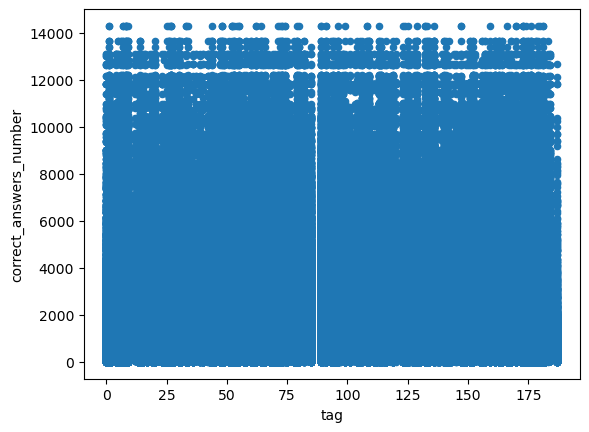

In [259]:
train_lectures.plot.scatter(x='tag',y='correct_answers_number')

In [ ]:
# Вывод: tag слабо коррелирует с числом правильных ответов. Для отдельных tag наблюдается некоторое снижение данного числа.

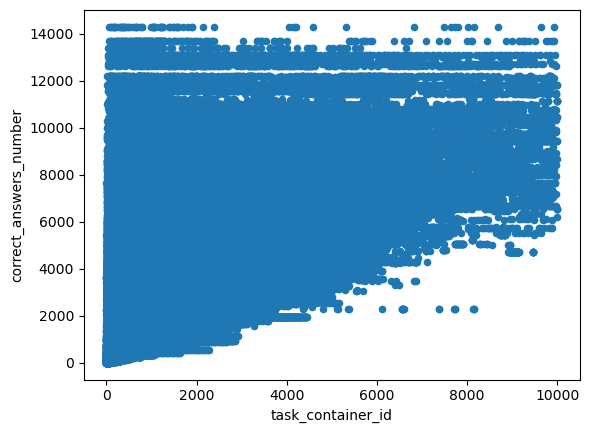

In [260]:
train_lectures.plot.scatter(x='task_container_id',y='correct_answers_number')

In [ ]:
# Вывод: с увеличением task_container_number увеличивается число правильных ответов на вопросы. 
# При этом максимальное число правильных ответов наблюдается при низких значениях параметра,
# а при высоких оно несколько снижается.

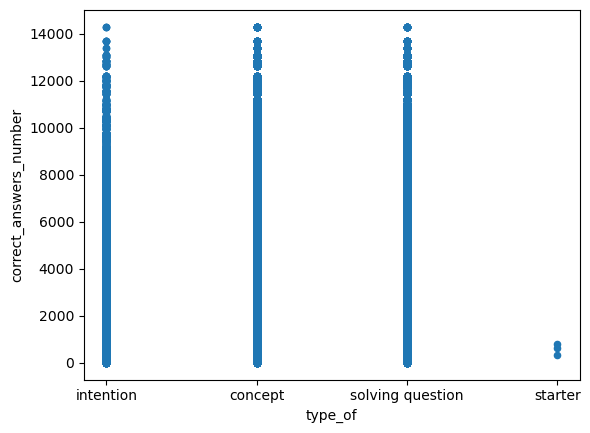

In [261]:
train_lectures.plot.scatter(x='type_of',y='correct_answers_number')

In [ ]:
# Вывод: число правильных ответов многократно ниже, если тип лекции - starter. При трех других типах лекций число правильных ответов практически одинаково.

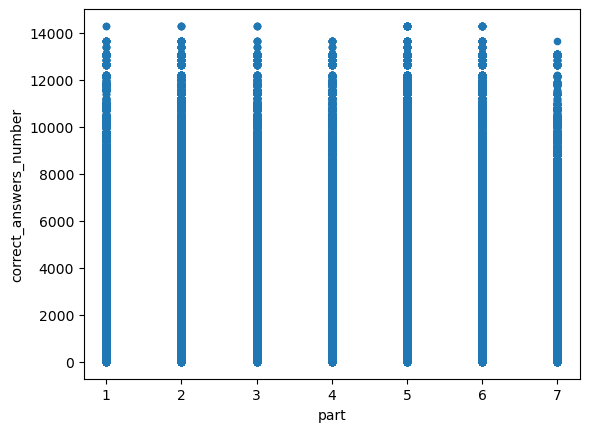

In [264]:
train_lectures.plot.scatter(x='part',y='correct_answers_number')

In [ ]:
# Вывод: количество правильных ответов мало коррелирует с параметром part. Минимальное значение показано для part = 4 и 7
# (для 7 также было минимальным в train_questions).